Collecting the dataset from Kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:28<00:00, 215MB/s]
100% 2.70G/2.70G [00:29<00:00, 98.1MB/s]


Extracting the data from zipfile

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

Importing the necessary libraries

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

Creating generators for the training and validating datasets

In [7]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels ='inferred',
    label_mode ='categorical',
    class_names=None,
    color_mode="rgb",
    shuffle=True,
    seed=None,
    validation_split=None,
    batch_size=32,
    subset=None,
    interpolation="bilinear",
    crop_to_aspect_ratio=False,
    follow_links=False,
    image_size=(128,128)
)

validate_ds=keras.utils.image_dataset_from_directory(
    directory='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels ='inferred',
    label_mode ='categorical',
    class_names=None,
    color_mode="rgb",
    shuffle=True,
    seed=None,
    validation_split=None,
    batch_size=32,
    subset=None,
    interpolation="bilinear",
    crop_to_aspect_ratio=False,
    follow_links=False,
    image_size=(128,128)
)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


Building the CNN Model

In [8]:
model=Sequential()

#Adding the convolutional layers
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

Flattening the CNN Layers

In [9]:
model.add(Dropout(0.2))
model.add(Flatten())

#Adding the Dense layer
model.add(Dense(units=1024,activation='relu'))
model.add(Dense(units=38,activation='softmax'))

Compiling the model

In [10]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

Training the model

In [11]:
ds=model.fit(train_ds,validation_data=validate_ds,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 172s 75ms/step - loss: 1.1687 - accuracy: 0.6544 - val_loss: 0.4663 - val_accuracy: 0.8480
Epoch 2/10
2197/2197 [==============================] - 170s 77ms/step - loss: 0.3768 - accuracy: 0.8783 - val_loss: 0.3221 - val_accuracy: 0.8964
Epoch 3/10
2197/2197 [==============================] - 164s 74ms/step - loss: 0.2271 - accuracy: 0.9259 - val_loss: 0.2504 - val_accuracy: 0.9155
Epoch 4/10
2197/2197 [==============================] - 154s 70ms/step - loss: 0.1591 - accuracy: 0.9471 - val_loss: 0.1709 - val_accuracy: 0.9449
Epoch 5/10
2197/2197 [==============================] - 153s 70ms/step - loss: 0.1181 - accuracy: 0.9612 - val_loss: 0.1783 - val_accuracy: 0.9454
Epoch 6/10
2197/2197 [==============================] - 161s 73ms/step - loss: 0.0961 - accuracy: 0.9686 - val_loss: 0.1948 - val_accuracy: 0.9418
Epoch 7/10
2197/2197 [==============================] - 153s 69ms/step - loss: 0.0784 - accuracy: 0.9734 - val_loss: 0

Evaluating the model

In [12]:
tr_loss,tr_acc=model.evaluate(train_ds)
print(tr_loss,tr_acc)

2197/2197 [==============================] - 54s 25ms/step - loss: 0.0245 - accuracy: 0.9916
0.024450888857245445 0.9916494488716125


In [13]:
val_loss, val_acc=model.evaluate(validate_ds)
print(val_loss,val_acc)

550/550 [==============================] - 13s 23ms/step - loss: 0.1446 - accuracy: 0.9622
0.14461807906627655 0.9622126221656799


Visualizing the accuracy

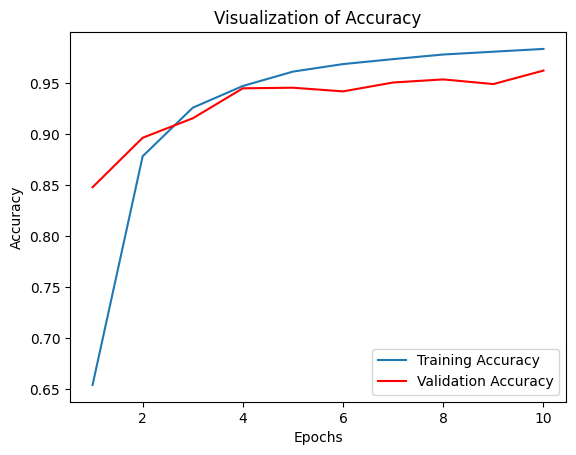

In [14]:
e=[i for i in range(1,11)]
plt.plot(e,ds.history['accuracy'],label='Training Accuracy')
plt.plot(e,ds.history['val_accuracy'],color='red',label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Visualization of Accuracy")
plt.show()

Other metrics of Evaluation

In [15]:
class_name=validate_ds.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [16]:
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels ='inferred',
    label_mode ='categorical',
    class_names=None,
    color_mode="rgb",
    shuffle=False,
    seed=None,
    validation_split=None,
    batch_size=32,
    subset=None,
    interpolation="bilinear",
    crop_to_aspect_ratio=False,
    follow_links=False,
    image_size=(128,128)
)

Found 17572 files belonging to 38 classes.


Prediction

In [17]:
y_pred=model.predict(test_ds)
predicted_ds=tf.argmax(y_pred,axis=1)
y_true=tf.argmax(tf.concat([i for x,i in test_ds],axis=0),axis=1)

550/550 [==============================] - 14s 25ms/step


Creating the Confusion matrix

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_true,predicted_ds,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.93      0.94       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.98      0.90      0.94       502
                               Blueberry___healthy       0.95      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.96      1.00      0.98       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.94      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

Confusion matrix Visualization

Text(0.5, 1.0, 'Confusion matrix')

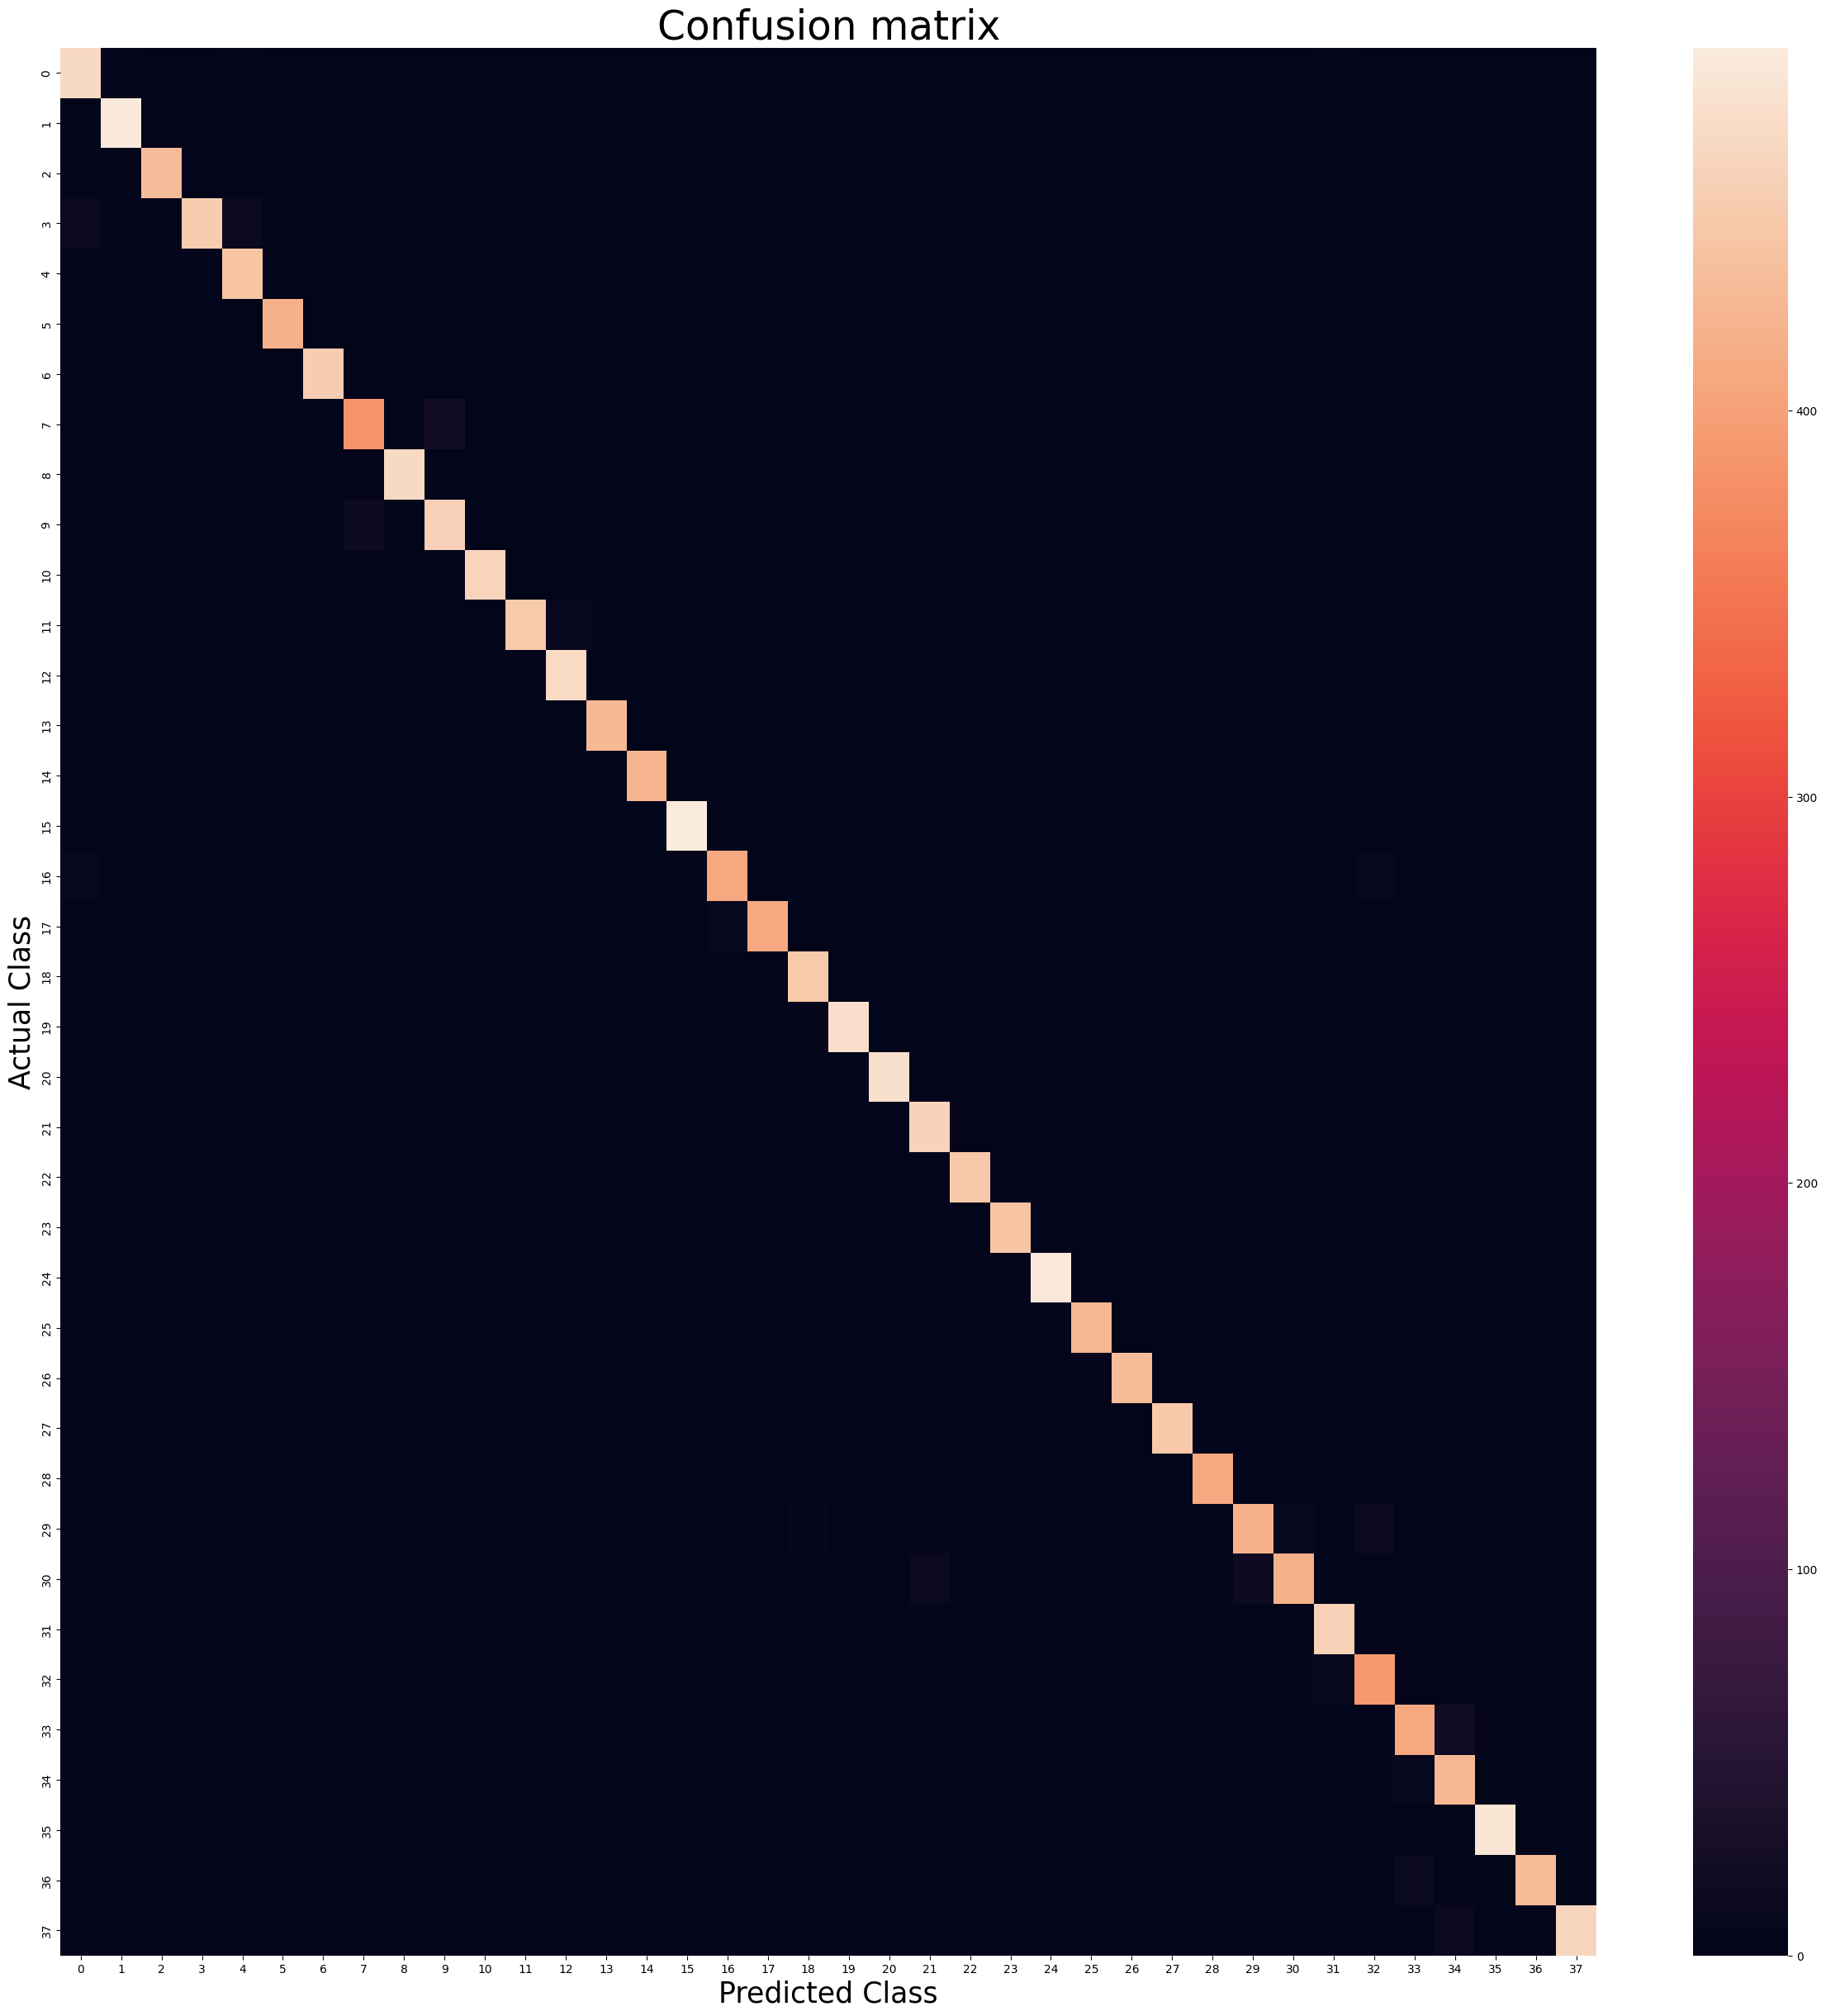

In [20]:
c=confusion_matrix(y_true, predicted_ds)
plt.figure(figsize=(30,30))
sns.heatmap(c)
plt.xlabel("Predicted Class",fontsize=25)
plt.ylabel("Actual Class",fontsize=25)
plt.title("Confusion matrix",fontsize=35)

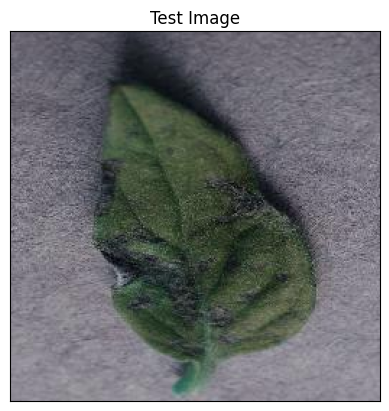

In [43]:
import cv2
image_path='/content/test/test/TomatoEarlyBlight6.JPG'
img=cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

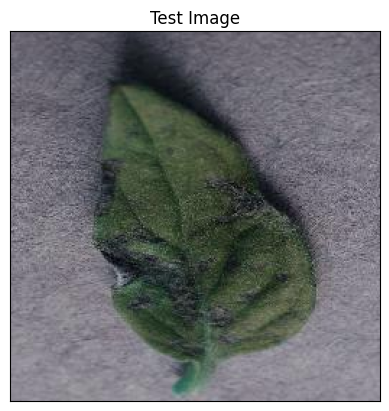

In [45]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

Testing the Model

In [46]:
import numpy as np

In [47]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
arr=tf.keras.preprocessing.image.img_to_array(image)
arr=np.array([arr])
print(arr.shape)

(1, 128, 128, 3)


In [48]:
pred=model.predict(arr)

1/1 [==============================] - 0s 31ms/step


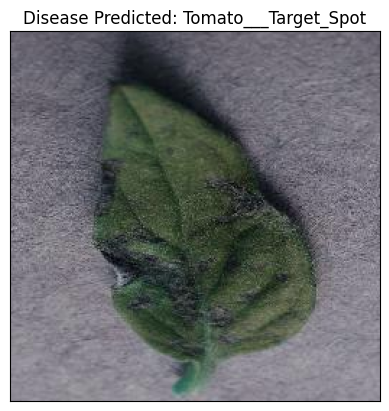

In [49]:
res=np.argmax(pred)
plt.imshow(img)
plt.title("Disease Predicted: "+ class_name[res])
plt.xticks([])
plt.yticks([])
plt.show()